### Student Performance Analysis Using PCA

---

#### **Dataset Description**
This dataset now includes **10 features** affecting student performance:

1. **Lecture Attendance (%)**: Percentage of lectures attended.
2. **Concentration in Class (Scale: 1-10)**: Self-reported or teacher-rated concentration level during classes.
3. **Study Time (Hours/Week)**: Hours spent studying outside of class per week.
4. **Parental Involvement (Scale: 1-10)**: Level of parental support in academic activities.
5. **Participation in Extracurricular Activities (1=Yes, 0=No)**: Whether the student participates in extracurricular activities.
6. **Sleep Quality (Scale: 1-10)**: Self-reported quality of sleep.
7. **Use of Technology for Study (Hours/Week)**: Time spent on educational technology tools like online learning platforms.
8. **Classroom Behavior (Scale: 1-10)**: Teacher-reported score for behavior in class.
9. **Social Media Usage (Hours/Week)**: Time spent on social media daily.
10. **Peer Influence (Scale: 1-10)**: Self-reported or peer-rated influence of classmates on study habits.
11. **Grades (Numeric)**: Final grades.

---

#### **Objective**
Perform PCA to:
1. Reduce dimensionality while preserving essential information.
2. Identify key factors influencing grades.

---


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset creation 
np.random.seed(42)
data = {
    'Lecture Attendance (%)': np.random.randint(50, 100, 100),
    'Concentration (1-10)': np.random.randint(1, 11, 100),
    'Study Time (hrs/week)': np.random.randint(5, 20, 100),
    'Parental Involvement (1-10)': np.random.randint(1, 11, 100),
    'Extracurricular (1=Yes, 0=No)': np.random.choice([0, 1], 100),
    'Sleep Quality (1-10)': np.random.randint(1, 11, 100),
    'Tech Study Time (hrs/week)': np.random.randint(0, 10, 100),
    'Classroom Behavior (1-10)': np.random.randint(1, 11, 100),
    'Social Media Usage (hrs/day)': np.random.randint(0, 5, 100),
    'Peer Influence (1-10)': np.random.randint(1, 11, 100),
    'Grades': np.random.randint(50, 100, 100)
}
df = pd.DataFrame(data)

print(df)
## Export to csv
df.to_csv("students_perf_data.csv", index=False)


    Lecture Attendance (%)  Concentration (1-10)  Study Time (hrs/week)  \
0                       88                     9                      9   
1                       78                     8                      5   
2                       64                     1                      5   
3                       92                     8                      7   
4                       57                     8                     18   
..                     ...                   ...                    ...   
95                      64                     1                     12   
96                      94                     2                      8   
97                      50                     2                     18   
98                      74                     6                      7   
99                      56                     7                     18   

    Parental Involvement (1-10)  Extracurricular (1=Yes, 0=No)  \
0                             9  

In [23]:
# Standardize features
features = list(data.keys())[:-1]  # Exclude 'Grades' for PCA
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [21]:
# Results Summary
print("Explained Variance by Component:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance by Component: [0.16043548 0.12622597 0.12025232 0.11060819 0.09940164 0.09041391
 0.08492056 0.07757596 0.07125303 0.05891294]
Cumulative Explained Variance: [0.16043548 0.28666146 0.40691377 0.51752196 0.6169236  0.70733752
 0.79225807 0.86983403 0.94108706 1.        ]


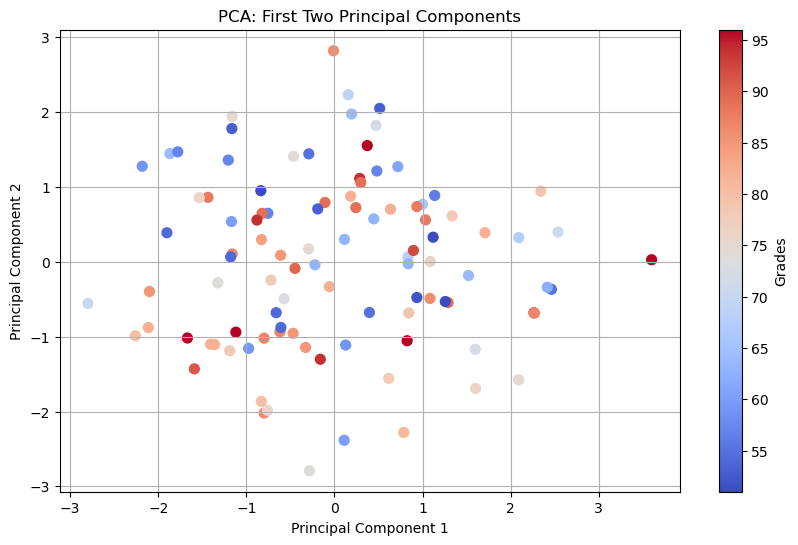

In [16]:
# Visualize first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Grades'], cmap='coolwarm', s=50)
plt.colorbar(label='Grades')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [17]:
# PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features))], index=features)
print("\nPCA Loadings:")
print(loadings)


PCA Loadings:
                                    PC1       PC2       PC3       PC4  \
Lecture Attendance (%)        -0.546968  0.183164  0.031954  0.122162   
Concentration (1-10)           0.360273  0.049375 -0.223791  0.109894   
Study Time (hrs/week)          0.416779  0.211087  0.420253 -0.219982   
Parental Involvement (1-10)   -0.131961 -0.511122  0.056999 -0.179879   
Extracurricular (1=Yes, 0=No) -0.140852 -0.287943  0.362516  0.480002   
Sleep Quality (1-10)           0.240227 -0.363499  0.033327  0.593416   
Tech Study Time (hrs/week)    -0.064284  0.386584 -0.336006  0.518525   
Classroom Behavior (1-10)      0.231692 -0.470519 -0.178792 -0.061570   
Social Media Usage (hrs/day)   0.370684  0.058475 -0.474101  0.013427   
Peer Influence (1-10)         -0.327326 -0.262511 -0.516593 -0.192009   

                                    PC5       PC6       PC7       PC8  \
Lecture Attendance (%)        -0.360633  0.014180  0.225346  0.183573   
Concentration (1-10)          -0.35

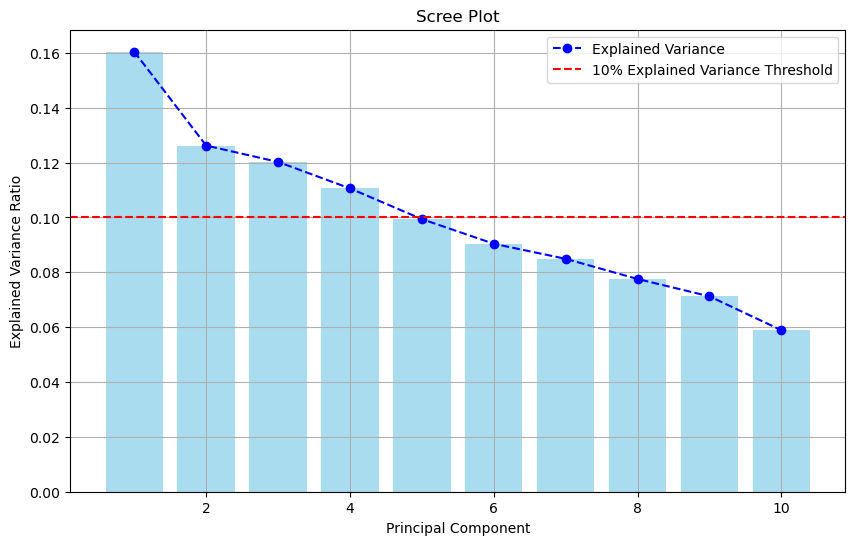

In [18]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='skyblue')
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='blue', linestyle='--', label='Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.axhline(y=0.1, color='red', linestyle='--', label='10% Explained Variance Threshold')
plt.legend()
plt.grid()
plt.show()


 **The threshold of 10% or eigenvalue ≥ 1** is very important in determining the number of PCs to retain in the analysis. The explained variance ratio is used in scree plot.

In [22]:
# Extract eigenvalues, explained variance ratio, and cumulative variance

import pandas as pd

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Create a DataFrame for the table with variance ratio in percentages
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues,
    'Explained Variance Ratio (%)': explained_variance * 100,
    'Cumulative Variance (%)': cumulative_variance * 100
})

# Display the table
print(pca_summary)

# Optionally save the table as a CSV file
pca_summary.to_csv("PCA_Summary_Table.csv", index=False)



  Principal Component  Eigenvalue  Explained Variance Ratio (%)  \
0                 PC1    1.620560                     16.043548   
1                 PC2    1.275010                     12.622597   
2                 PC3    1.214670                     12.025232   
3                 PC4    1.117254                     11.060819   
4                 PC5    1.004057                      9.940164   
5                 PC6    0.913272                      9.041391   
6                 PC7    0.857783                      8.492056   
7                 PC8    0.783596                      7.757596   
8                 PC9    0.719728                      7.125303   
9                PC10    0.595080                      5.891294   

   Cumulative Variance (%)  
0                16.043548  
1                28.666146  
2                40.691377  
3                51.752196  
4                61.692360  
5                70.733752  
6                79.225807  
7                86.983403  
8

### The Rotated Component Matrix

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from factor_analyzer import Rotator

# Sample data: Replace this with your actual dataset
np.random.seed(42)
data_dict = {
     'Lecture Attendance (%)': np.random.randint(50, 100, 100),
    'Concentration (1-10)': np.random.randint(1, 11, 100),
    'Study Time (hrs/week)': np.random.randint(5, 20, 100),
    'Parental Involvement (1-10)': np.random.randint(1, 11, 100),
    'Extracurricular (1=Yes, 0=No)': np.random.choice([0, 1], 100),
    'Sleep Quality (1-10)': np.random.randint(1, 11, 100),
    'Tech Study Time (hrs/week)': np.random.randint(0, 10, 100),
    'Classroom Behavior (1-10)': np.random.randint(1, 11, 100),
    'Social Media Usage (hrs/day)': np.random.randint(0, 5, 100),
    'Peer Influence (1-10)': np.random.randint(1, 11, 100),
}

# Convert dictionary to DataFrame
data = pd.DataFrame(data_dict)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Apply Varimax rotation
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(loadings)

# Create a DataFrame for the rotated component matrix
rotated_matrix = pd.DataFrame(
    rotated_loadings,
    columns=[f'PC{i+1}' for i in range(rotated_loadings.shape[1])],
    index=data.columns
)

# Display the rotated component matrix
print(rotated_matrix)

# Optionally save the matrix to a CSV file
rotated_matrix.to_csv("Rotated_Component_Matrix.csv", index=True)


                                    PC1       PC2       PC3       PC4  \
Lecture Attendance (%)        -0.981455  0.040203 -0.070734 -0.068809   
Concentration (1-10)           0.043101  0.011081  0.032124  0.046512   
Study Time (hrs/week)          0.091955 -0.049197  0.115391 -0.008732   
Parental Involvement (1-10)    0.036245 -0.040944 -0.048094 -0.001402   
Extracurricular (1=Yes, 0=No) -0.036398 -0.015597  0.018082  0.060589   
Sleep Quality (1-10)           0.065615  0.011295  0.028026  0.997225   
Tech Study Time (hrs/week)    -0.038005  0.999547  0.014007  0.011205   
Classroom Behavior (1-10)      0.055600 -0.053024 -0.019893  0.066340   
Social Media Usage (hrs/day)   0.130426  0.047102 -0.029308  0.002489   
Peer Influence (1-10)         -0.068186 -0.014354 -0.993098 -0.028390   

                                    PC5       PC6       PC7       PC8  \
Lecture Attendance (%)         0.038412  0.038388 -0.045173 -0.058489   
Concentration (1-10)          -0.046454  0.021563 

To decide which variables to include in the analysis, consider variables with **high absolute loadings** on components that have eigenvalues ≥ 1, as those components contribute the most to explaining the variance in the data. Let’s break this down:

### Steps:
1. **Identify Key Components**: Select components where the eigenvalue ≥ 1.
2. **Inspect Loadings**: For these components, look at variables with absolute loadings greater than 0.5 (a common threshold for significance in PCA).

---

### Analysis of Loadings:

#### Components with eigenvalue ≥ 1:
- **PC1**, **PC2**, **PC3**, **PC4**, and **PC5** meet the criterion.

#### Variables to Include:
From the table:
- **PC1** (focuses on *Lecture Attendance*):
  - Lecture Attendance (loading = -0.981455) is significant.

- **PC2** (focuses on *Tech Study Time*):
  - Tech Study Time (loading = 0.999547) is significant.

- **PC3** (focuses on *Peer Influence*):
  - Peer Influence (loading = -0.993098) is significant.
  
- **PC4** (focuses on *Sleep Quality*):
  - Sleep Quality (loading = 0.997225) is significant.
  
- **PC5** (focuses on *Extracurricular*):
  - Extracurricular (loading = 0.999888) is significant.
---

### Suggested Variables for Analysis:
Based on this evaluation, include:
1. **Lecture Attendance (%)** (dominant in PC1).
2. **Tech Study Time (hrs/week)** (dominant in PC2).
3. **Peer Influence (1-10)** (dominant in PC3).
4. **Sleep Quality (1-10)** (dominant in PC4).
5. **Extracurricular (1=Yes, 0=No)** (dominant in PC5).


These variables are the primary drivers of variance in their respective components, making them the most informative for the analysis. 